# Doc2Vec

In [122]:
import nltk
# nltk.download('all')
from nltk.tokenize import sent_tokenize
import re
import pandas as pd

## Embedding the text

### Read the data

In [123]:
import os
os.chdir('/Users/gretel.depaepe/Documents/Projects/deep_space_9')
PATH = 'resources/ScriptsDS9/'
trn_files = !ls {PATH}
trn_files[:10] # as a test

['402.txt',
 '403.txt',
 '404.txt',
 '405.txt',
 '406.txt',
 '407.txt',
 '408.txt',
 '409.txt',
 '410.txt',
 '411.txt']

In [124]:
scripts = []
counter = 0
for f in trn_files:
    script = {}
    if f != 'all_scripts.json':
        try:
            text = open(PATH+f, 'r').read()
            text = re.sub("\t",' ',text)
            text = re.sub("\n",' ',text)
            text = re.sub(' +',' ',text)
            title = text.split("#")[0].split('"')[1]
            script['title'] = title
            script['text'] = text
            scripts.append(script)
            print("OK", title)
        except:
            print(f, 'Error')
            counter += 1
print(counter, 'files not read')

OK Emissary
OK A Man Alone
OK Past Prologue
OK Babel
OK Captive Pursuit
OK Q-Less
OK Dax
OK The Passenger
OK Move Along Home
OK The Nagus
OK Vortex
OK Battle Lines
414.txt Error
OK Progress
OK If Wishes Were Horses
OK The Forsaken
OK Dramatis Personae
OK Duet
420.txt Error
OK The Homecoming
OK The Circle
OK The Siege
OK Invasive Procedures
OK Cardassians
OK Melora
OK Rules of Acquisition
OK Necessary Evil
OK Second Sight
OK Sanctuary
OK Rivals
OK The Alternate
OK Armageddon Game
OK Whispers
OK Paradise
OK Shadowplay
OK Playing God
OK Profit and Loss
OK Blood Oath
OK The Maquis, Part I
OK The Maquis, Part II
OK The Wire
OK Crossover
OK The Collaborator
OK Tribunal
OK The Jem'Hadar
OK The Search
OK The Search, Part II
OK The House of Quark
OK Equilibrium
OK Second Skin
OK The Abandoned
OK Civil Defense
OK Meridian
OK Defiant
OK Fascination
OK Past Tense, Part I
OK Past Tense, Part II
459.txt Error
OK Heart of Stone
OK Destiny
OK Prophet Motive
OK Visionary
464.txt Error
OK Improbable Cau

In [125]:
df = pd.DataFrame(scripts)

In [126]:
df['length'] = df['text'].apply(len)

In [127]:
df.sort_values(by='length')

,title,text,length
134,His Way,"STAR TREK: DEEP SPACE NINE ""His Way"" #40510-5...",46849
150,It's Only a Paper Moon,"STAR TREK: DEEP SPACE NINE ""It's Only a Paper...",49701
154,Chimera,"STAR TREK: DEEP SPACE NINE ""Chimera"" (fka ""Un...",49790
14,The Forsaken,"STAR TREK: DEEP SPACE NINE ""The Forsaken"" (fk...",50254
10,Vortex,"STAR TREK: DEEP SPACE NINE ""Vortex"" #40511-41...",50302
...,...,...,...
127,One Little Ship,"STAR TREK: DEEP SPACE NINE ""One Little Ship"" ...",74641
92,... Nor the Battle to the Strong,"   STAR TREK: DEEP SPACE NINE ""... Nor the Ba...",74663
165,What You Leave Behind,"STAR TREK: DEEP SPACE NINE ""What You Leave Be...",116256
0,Emissary,"STAR TREK: DEEP SPACE NINE ""Emissary"" #40511-...",124436


In [128]:
df['length'].describe()

count       166.000000
mean      59776.216867
std        9760.980123
min       46849.000000
25%       55602.000000
50%       58310.500000
75%       60963.000000
max      126270.000000
Name: length, dtype: float64

In [129]:
import smart_open
import gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


def read_corpus(df, tokens_only=False):
    for i, row in df.iterrows():
        tokens = gensim.utils.simple_preprocess(row['text'],
                                                min_len=1, max_len=30)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

corpus = list(read_corpus(pd.DataFrame(df['text'])))

In [130]:
len(corpus)

166

### Train Doc2Vec

<font color='purple' size=4>While Word2Vec computes a feature vector for every word in the corpus, Gensim’s Doc2Vec computes a feature vector for every document in the corpus.  

In [131]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50,
                                      min_count=1,
                                      epochs=50,
                                      seed=3)

2022-09-29 14:10:21,964 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec<dm/m,d50,n5,w5,s0.001,t3>', 'datetime': '2022-09-29T14:10:21.964148', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}


In [132]:
model.build_vocab(corpus)

2022-09-29 14:10:21,970 : INFO : collecting all words and their counts
2022-09-29 14:10:21,971 : INFO : PROGRESS: at example #0, processed 0 words (0 words/s), 0 word types, 0 tags
2022-09-29 14:10:22,188 : INFO : collected 26488 word types and 166 unique tags from a corpus of 166 examples and 1772329 words
2022-09-29 14:10:22,189 : INFO : Creating a fresh vocabulary
2022-09-29 14:10:22,249 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 retains 26488 unique words (100.00% of original 26488, drops 0)', 'datetime': '2022-09-29T14:10:22.249855', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2022-09-29 14:10:22,250 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 1772329 word corpus (100.00% of original 1772329, drops 0)', 'datetime': '2022-09-29T14:10:22.250494', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12

In [133]:
print(f"Word 'raktajino' appeared {model.wv.get_vecattr('raktajino', 'count')} times in the training corpus.")

Word 'raktajino' appeared 98 times in the training corpus.


In [134]:
model.train(corpus,
            total_examples=model.corpus_count,
            epochs=model.epochs)

2022-09-29 14:10:22,533 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 26488 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2022-09-29T14:10:22.533079', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2022-09-29 14:10:23,157 : INFO : EPOCH 0: training on 1772329 raw words (1324346 effective words) took 0.6s, 2130298 effective words/s
2022-09-29 14:10:23,786 : INFO : EPOCH 1: training on 1772329 raw words (1324744 effective words) took 0.6s, 2116918 effective words/s
2022-09-29 14:10:24,415 : INFO : EPOCH 2: training on 1772329 raw words (1324555 effective words) took 0.6s, 2117237 effective words/s
2022-09-29 14:10:25,037 : INFO : EPOCH 3: training on 1772329 raw words (1324662 effective words) took 0.6s, 2133932 effective words/s
2022-09-29 14:10:25,666 : INFO : EPOCH 4: training on 1772329 ra

<font color='purple' size=4>We trained the model for 50 epoch and requested to embed each document in a 50-dimensional vector. This took us half a minute using a normal laptop.  

In [135]:
doc_id = 9

inferred_vector = model.infer_vector(corpus[doc_id].words)
sims = model.dv.most_similar([inferred_vector], topn=5)
print(f"""The most similar scripts compared to '{df['title'].iloc[doc_id]}' 
          are: """)
for i in range(5):
    print(f"'{df['title'].iloc[sims[i][0]]}'")

The most similar scripts compared to 'The Nagus' 
          are: 
'The Nagus'
'Ferengi Love Songs'
'Profit and Lace'
'Prophet Motive'
'Little Green Men'


In [136]:
doc_id = 17

inferred_vector = model.infer_vector(corpus[doc_id].words)
sims = model.dv.most_similar([inferred_vector], topn=5)
print(f"""The most similar scripts compared to '{df['title'].iloc[doc_id]}' 
          are: """)
for i in range(5):
    print(f"'{df['title'].iloc[sims[i][0]]}'")

The most similar scripts compared to 'The Homecoming' 
          are: 
'The Homecoming'
'The Circle'
'The Siege'
'Sanctuary'
'Progress'


In [137]:
all_sims = pd.DataFrame()
doc_embeddings = []
for i, row in df.iterrows():
    print(f"Inferring vector for {row['title']}")
    doc_id = i
    inferred_vector = model.infer_vector(corpus[doc_id].words)
    doc_embeddings.append(inferred_vector)
    sims = model.dv.most_similar([inferred_vector], topn=len(corpus))
    sims_df = pd.DataFrame(sims).sort_values(by=0).set_index(df['title']).drop(0, axis=1).rename({1: row['title']}, axis=1)
    all_sims = pd.concat([all_sims, sims_df], axis=1)

Inferring vector for Emissary
Inferring vector for A Man Alone
Inferring vector for Past Prologue
Inferring vector for Babel
Inferring vector for Captive Pursuit
Inferring vector for Q-Less
Inferring vector for Dax
Inferring vector for The Passenger
Inferring vector for Move Along Home
Inferring vector for The Nagus
Inferring vector for Vortex
Inferring vector for Battle Lines
Inferring vector for Progress
Inferring vector for If Wishes Were Horses
Inferring vector for The Forsaken
Inferring vector for Dramatis Personae
Inferring vector for Duet
Inferring vector for The Homecoming
Inferring vector for The Circle
Inferring vector for The Siege
Inferring vector for Invasive Procedures
Inferring vector for Cardassians
Inferring vector for Melora
Inferring vector for Rules of Acquisition
Inferring vector for Necessary Evil
Inferring vector for Second Sight
Inferring vector for Sanctuary
Inferring vector for Rivals
Inferring vector for The Alternate
Inferring vector for Armageddon Game
Infe

## Dimensionality Reduction

In [138]:
import numpy as np
doc_embeddings = np.array(doc_embeddings)
doc_embeddings.shape

(166, 50)

<font color='purple' size=4>For example here is the document vector for episode The Maquis, Part I and The Maquis, Part II.  As we saw in the Bag to Words similarity exercise, multi-part episodes provide a nice way of checking whether the vectors were able to embed anything useful for similarity discovery and the likes.  

In [139]:
print(df.loc[36]['title'])
doc_embeddings[36]

The Maquis, Part I


array([ 3.6415138 , -3.8437922 , -0.41714263,  1.5910972 ,  1.6709527 ,
        1.0584058 ,  2.9702353 ,  3.1939042 , -1.3095679 ,  4.5405774 ,
        2.0560393 ,  6.089908  , -1.4159873 ,  0.1261762 ,  1.1800828 ,
        5.2479186 ,  0.60582685,  3.9294567 ,  8.065656  ,  2.6397734 ,
        5.740399  ,  1.5648685 , -2.0495224 ,  0.23161088,  0.4103946 ,
        2.8416762 , -1.1840816 , -3.7173266 ,  4.107258  , -0.92860514,
       -1.0511168 ,  5.3362026 ,  2.6723378 , -0.50343215,  4.7843204 ,
        1.649263  , -4.5519705 ,  2.4291754 ,  5.8891225 , -0.7221585 ,
        0.5584846 ,  0.44782704, -0.29252884, -4.8151217 ,  4.128568  ,
       -1.2556384 ,  3.3353267 , -5.205019  , -2.2066112 , -0.8151218 ],
      dtype=float32)

In [140]:
print(df.loc[37]['title'])
doc_embeddings[37]

The Maquis, Part II


array([-0.75446063, -6.487563  , -1.9830737 ,  2.3375628 , -1.4955459 ,
        1.8747909 ,  4.659483  ,  3.2609243 , -2.1075304 ,  3.157266  ,
        2.6526926 ,  4.0078373 , -0.71579707,  0.42623955,  2.2828476 ,
        4.359351  ,  0.0204813 ,  5.6568217 ,  5.952047  ,  4.8780932 ,
        1.9177431 ,  1.8387516 , -2.441538  ,  0.25699607,  1.1681447 ,
        2.8455777 ,  0.80487555, -2.607233  ,  5.932713  , -0.3882755 ,
       -0.38931736,  4.694014  ,  2.5158448 ,  0.96580535,  2.911487  ,
        0.9680258 , -4.4358225 ,  3.3070576 ,  7.504463  , -2.7600331 ,
        0.95957243,  1.5437496 , -1.9028528 , -5.1843133 ,  2.48476   ,
       -1.508108  , -0.98949146, -4.591182  ,  0.32706228, -1.0453093 ],
      dtype=float32)

### Dimensionality Reduction with TSNE

<font color='purple' size=4><font color='purple' size=4>We could of course resort back to calculating pairwise cosine similarity, but just for the heck of it, let’s try another approach.  Let’s see if we can squeeze our 50 dimensional script vectors into just 3 dimensions, since us humans can sadly enough only visualize things at most in 3 dimensions.  

In [153]:
from sklearn.manifold import TSNE
doc_embeddings_tsne = TSNE(n_components=3, learning_rate='auto',
                           init='random', random_state=3, perplexity=5).fit_transform(doc_embeddings)
doc_embeddings_tsne.shape

(166, 3)

In [154]:
df_doc_embeddings_tsne = pd.DataFrame(doc_embeddings_tsne, columns=['dim1', 'dim2', 'dim3'], index=df['title'])
df_doc_embeddings_tsne

,dim1,dim2,dim3
title,,,
Emissary,-39.517204,1.043823,3.656014
A Man Alone,-39.255020,-3.463726,-28.837351
Past Prologue,-16.594511,-40.031448,-26.758219
Babel,12.283007,7.270860,5.085349
Captive Pursuit,-45.492222,-14.266699,-24.288284
...,...,...,...
When it Rains...,26.265753,-2.899107,-16.521763
Tacking into the Wind,23.700840,-12.714571,-10.770403
Extreme Measures,17.768978,42.111938,4.886300


<font color='purple' size=4>The verbose bit of code, is my attempt to display all titles of multi-part episodes in a particular color so we can see if they appear close together in the vector space. 

<IPython.core.display.Javascript object>


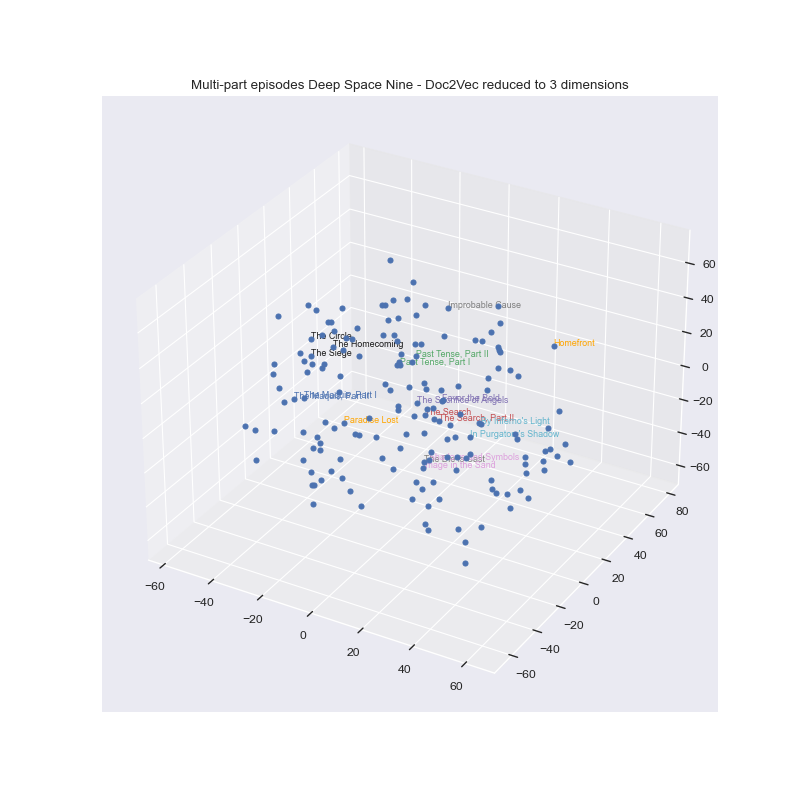

In [155]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(111, projection = '3d')
    
for i, row in df_doc_embeddings_tsne.iterrows():
    ax.scatter(row['dim1'], row['dim2'], row['dim3'], color='b')
    if i in ['The Homecoming', 'The Circle', 'The Siege']:
        ax.text(row['dim1'], row['dim2'], row['dim3'],  '%s' % (i), size=8, color='k')
    elif i in ['The Maquis, Part I', 'The Maquis, Part II']:
        ax.text(row['dim1'], row['dim2'], row['dim3'],  '%s' % (i), size=8, color='b')
    elif i in ['The Search', 'The Search, Part II']:
        ax.text(row['dim1'], row['dim2'], row['dim3'],  '%s' % (i), size=8, color='r')
    elif i in ['Past Tense, Part I', 'Past Tense, Part II']:
        ax.text(row['dim1'], row['dim2'], row['dim3'],  '%s' % (i), size=8, color='g')             ,
    elif i in ['Improbable Cause', 'The Die is Cast']:
        ax.text(row['dim1'], row['dim2'], row['dim3'],  '%s' % (i), size=8, color='grey')               ,
    elif i in ['Homefront', 'Paradise Lost']:
        ax.text(row['dim1'], row['dim2'], row['dim3'],  '%s' % (i), size=8, color='orange')         ,
    elif i in ["In Purgatory's Shadow", "By Inferno's Light"]:
        ax.text(row['dim1'], row['dim2'], row['dim3'],  '%s' % (i), size=8, color='c')                ,
    elif i in ["Favor the Bold", "The Sacrifice of Angels"]:
        ax.text(row['dim1'], row['dim2'], row['dim3'],  '%s' % (i), size=8, color='m')          
    elif i in ["Image in the Sand", "Shadows and Symbols"]:
        ax.text(row['dim1'], row['dim2'], row['dim3'],  '%s' % (i), size=8, color='plum')   

plt.title('Multi-part episodes Deep Space Nine - Doc2Vec reduced to 3 dimensions')
plt.show()

<font color='purple' size=4>Remember The Homecoming, The Circle and The Siege?  As you can see they are nicely clustered together.  But I am not cherry-picking as is often the case.  Homefront and Paradise Lost are quite far apart.  Of course we are trying to capture as much as is possible into 50 dimensions first when creating the document vectors and then we are squeezing this again into 3.  To be honest I am surprised to see anything meaningful at all at the end of this.
